In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
sd_axon = 1e3 * np.diff(phi_axon, n=2, axis=0)  # V => mV
sd_max_indx = np.argmax(sd_axon, axis=0)  # row index per column where SD is max

In [18]:
window_size = 11  # window size
nn = int((window_size - 1) / 2)  # number of neighbors to left/right of max

In [19]:
def get_field_sd(num_axons, phi_axon):
    sd_axon = 1e3 * np.diff(phi_axon, n=2, axis=0)  # V => mV
    sd_max_indx = np.argmax(sd_axon, axis=0)  # row index per column where SD is max

    window_size = 11  # window size
    nn = int((window_size - 1) / 2)  # number of neighbors to left/right of max
    sd_11_axon = np.zeros((window_size, sd_axon.shape[1]))  # pre-allocate 11SD for each column

    for k in range(0, num_axons):
        # define the bounds of the window
        w_indx_l = np.maximum(sd_max_indx[k] - nn, 0)  # first index of window
        w_indx_r = np.minimum(sd_max_indx[k] + nn, sd_axon.shape[0] - 1)  # last index of window

        # calculate padding
        pad_l = nn - (sd_max_indx[k] - w_indx_l)
        pad_r = nn - (w_indx_r - sd_max_indx[k])

        # pad the values within the window
        sd_11_axon[:, k] = np.pad(sd_axon[w_indx_l:w_indx_r + 1, k], (pad_l, pad_r), 'constant')

    return sd_11_axon

In [20]:
# Generate sample data
num_axons = 10
phi_axon = np.random.rand(30, num_axons)  # Assuming 30 time steps

In [21]:
# Call the function
sd_11_axon = get_field_sd(num_axons, phi_axon)

In [22]:
# Plotting
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

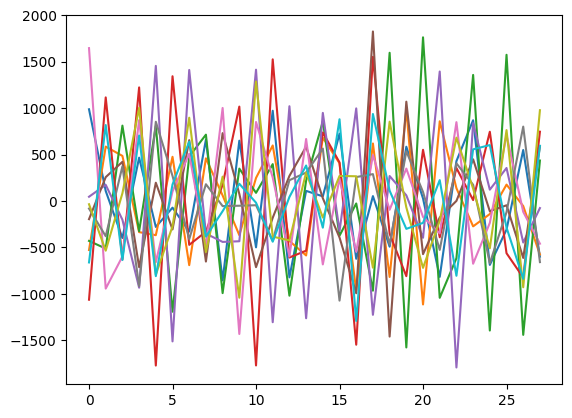

In [23]:
# Plot each column of sd_axon
for k in range(num_axons):
    plt.plot(range(sd_axon.shape[0]), sd_axon[:, k], label=f'Axon {k+1}')

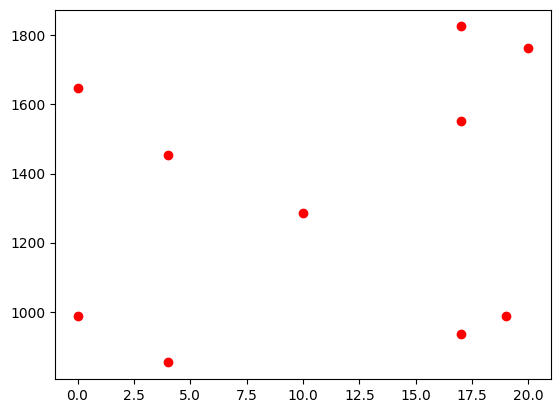

In [24]:
# Highlight maximum values
for k, max_index in enumerate(sd_max_indx):
    plt.scatter(max_index, sd_axon[max_index, k], color='red', marker='o', label=f'Maximum (Axon {k+1})')


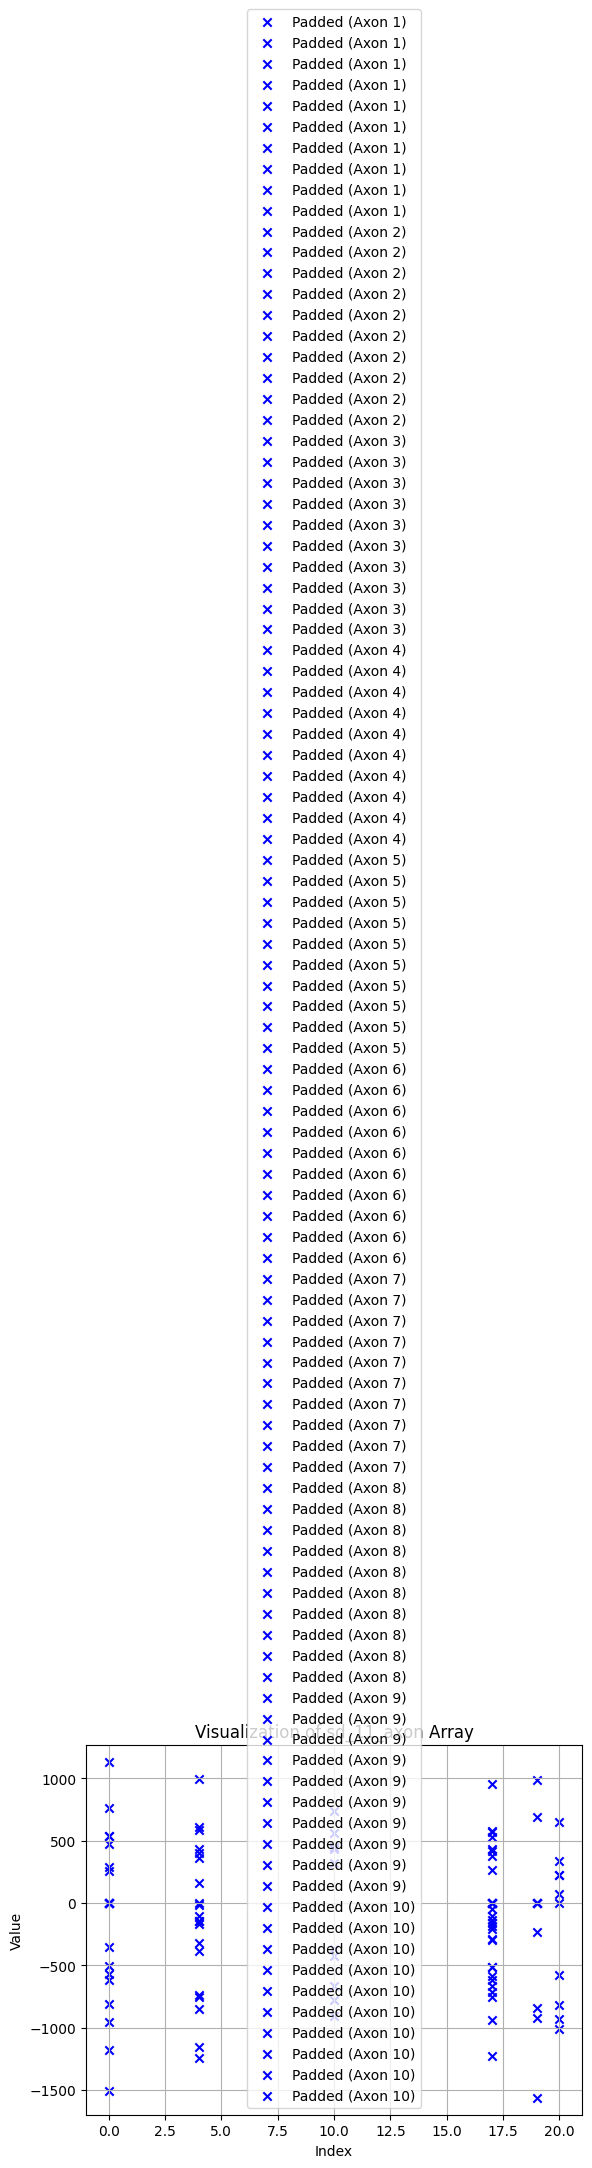

In [25]:
# Highlight padded values
for k in range(num_axons):
    for i in range(len(sd_11_axon)):
        if i < nn or i >= window_size - nn:
            plt.scatter(sd_max_indx[k], sd_11_axon[i, k], color='blue', marker='x', label=f'Padded (Axon {k+1})')

plt.title('Visualization of sd_11_axon Array')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
arr = np.array([1, 3, 6, 10, 15])
diff_arr = np.diff(arr)
print(diff_arr)

[2 3 4 5]


In [27]:
arr_2d = np.array([[1, 3, 6],
                   [4, 9, 12],
                   [7, 15, 18]])

In [28]:
arr_2nd_diff = np.diff(arr_2d, n=2, axis=0)
print(arr_2nd_diff)

[[0 0 0]]


In [29]:
arr_2nd_diff_y = np.diff(arr_2d, n=2, axis=1)
print(arr_2nd_diff_y)

[[ 1]
 [-2]
 [-5]]


In [34]:
array_2d_2 = np.array([[80, 75, 90],
 [60, 85, 100],
 [95, 65, 75]])

In [35]:
array_2d_2

array([[ 80,  75,  90],
       [ 60,  85, 100],
       [ 95,  65,  75]])

In [36]:
array_argmax_2_x = np.argmax(array_2d_2, axis=0)
print(array_argmax_2_x)

array_argmax_2_y = np.argmax(array_2d_2, axis=1)
print(array_argmax_2_y)

[2 1 1]
[2 2 0]


In [38]:
test_0 = np.zeros(10)
print(test_0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
test_0 = np.zeros((10, 3))
print(test_0)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [45]:
array_2d_2.shape

(3, 3)

In [46]:
random_1 = np.random.rand(10, 11)
print(random_1)

[[0.7099186  0.13277644 0.22398567 0.21205334 0.44603532 0.33054011
  0.78083382 0.36309297 0.94409387 0.56248815 0.5439722 ]
 [0.03889338 0.28572936 0.38990618 0.27035539 0.06125249 0.82438754
  0.26897166 0.00109382 0.40404588 0.06516399 0.0705027 ]
 [0.86907321 0.29225666 0.88218884 0.63150053 0.47121231 0.94222463
  0.85985015 0.90118239 0.35091529 0.26094578 0.18439277]
 [0.87092083 0.44338355 0.46674216 0.62842179 0.88119635 0.95493786
  0.44571428 0.7420835  0.85758217 0.19261929 0.14537439]
 [0.20858274 0.82108712 0.61230867 0.83723527 0.72683125 0.93431845
  0.94778834 0.54674004 0.41254132 0.54851771 0.83624143]
 [0.89011233 0.1994556  0.06962242 0.38470187 0.84545159 0.22727379
  0.35076598 0.69616865 0.35816138 0.52754051 0.58331833]
 [0.26407461 0.12217015 0.90843743 0.46308172 0.84622044 0.46638571
  0.89843586 0.17385733 0.50973934 0.58690803 0.42766846]
 [0.04783174 0.52988408 0.08261255 0.01652003 0.58885258 0.59268057
  0.2379986  0.88584093 0.96149502 0.45624341 0.69

In [47]:
random_2nd_diff = np.diff(random_1, n=2, axis=0)
print(random_2nd_diff)
print(random_1.shape)
print(random_2nd_diff.shape)

[[ 1.50120505e+00 -1.46425623e-01  3.26362154e-01  3.02843091e-01
   7.94742655e-01 -3.76010349e-01  1.10274065e+00  1.26208771e+00
   4.86917400e-01  6.93105952e-01  5.87359575e-01]
 [-8.28332202e-01  1.44599592e-01 -9.07729332e-01 -3.64223882e-01
   2.42211565e-05 -1.05123853e-01 -1.00501435e+00 -1.05918746e+00
   5.59797475e-01 -2.64108282e-01 -1.52908449e-01]
 [-6.64185716e-01  2.26576691e-01  5.61013180e-01  2.11892228e-01
  -5.64349143e-01 -3.33326406e-02  9.16209923e-01 -3.62445648e-02
  -9.51707737e-01  4.24224901e-01  7.29885423e-01]
 [ 1.34386768e+00 -9.99335104e-01 -6.88252758e-01 -6.61346890e-01
   2.72985447e-01 -6.86425254e-01 -1.09909641e+00  3.44772066e-01
   3.90660909e-01 -3.76875612e-01 -9.43790140e-01]
 [-1.30756730e+00  5.44346073e-01  1.38150126e+00  5.30913256e-01
  -1.17851499e-01  9.46156582e-01  1.14469224e+00 -6.71739938e-01
   2.05957897e-01  8.03447246e-02  9.72732243e-02]
 [ 4.09794850e-01  4.84999379e-01 -1.66463989e+00 -5.24941538e-01
  -2.58136702e-01 -

In [49]:
print(random_1.shape)
print(random_1.shape[0])
print(random_1.shape[1])



(10, 11)
10
11


In [50]:
nn

5

In [51]:
window_size

11

In [53]:
sd_11_axon = np.zeros((window_size, random_2nd_diff.shape[1]))
print(sd_11_axon)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [54]:
sd_axon = 1e3 * random_2nd_diff

In [55]:
sd_axon

array([[ 1.50120505e+03, -1.46425623e+02,  3.26362154e+02,
         3.02843091e+02,  7.94742655e+02, -3.76010349e+02,
         1.10274065e+03,  1.26208771e+03,  4.86917400e+02,
         6.93105952e+02,  5.87359575e+02],
       [-8.28332202e+02,  1.44599592e+02, -9.07729332e+02,
        -3.64223882e+02,  2.42211565e-02, -1.05123853e+02,
        -1.00501435e+03, -1.05918746e+03,  5.59797475e+02,
        -2.64108282e+02, -1.52908449e+02],
       [-6.64185716e+02,  2.26576691e+02,  5.61013180e+02,
         2.11892228e+02, -5.64349143e+02, -3.33326406e+01,
         9.16209923e+02, -3.62445648e+01, -9.51707737e+02,
         4.24224901e+02,  7.29885423e+02],
       [ 1.34386768e+03, -9.99335104e+02, -6.88252758e+02,
        -6.61346890e+02,  2.72985447e+02, -6.86425254e+02,
        -1.09909641e+03,  3.44772066e+02,  3.90660909e+02,
        -3.76875612e+02, -9.43790140e+02],
       [-1.30756730e+03,  5.44346073e+02,  1.38150126e+03,
         5.30913256e+02, -1.17851499e+02,  9.46156582e+02,
  

In [56]:
print(sd_axon)

[[ 1.50120505e+03 -1.46425623e+02  3.26362154e+02  3.02843091e+02
   7.94742655e+02 -3.76010349e+02  1.10274065e+03  1.26208771e+03
   4.86917400e+02  6.93105952e+02  5.87359575e+02]
 [-8.28332202e+02  1.44599592e+02 -9.07729332e+02 -3.64223882e+02
   2.42211565e-02 -1.05123853e+02 -1.00501435e+03 -1.05918746e+03
   5.59797475e+02 -2.64108282e+02 -1.52908449e+02]
 [-6.64185716e+02  2.26576691e+02  5.61013180e+02  2.11892228e+02
  -5.64349143e+02 -3.33326406e+01  9.16209923e+02 -3.62445648e+01
  -9.51707737e+02  4.24224901e+02  7.29885423e+02]
 [ 1.34386768e+03 -9.99335104e+02 -6.88252758e+02 -6.61346890e+02
   2.72985447e+02 -6.86425254e+02 -1.09909641e+03  3.44772066e+02
   3.90660909e+02 -3.76875612e+02 -9.43790140e+02]
 [-1.30756730e+03  5.44346073e+02  1.38150126e+03  5.30913256e+02
  -1.17851499e+02  9.46156582e+02  1.14469224e+03 -6.71739938e+02
   2.05957897e+02  8.03447246e+01  9.72732243e+01]
 [ 4.09794850e+02  4.84999379e+02 -1.66463989e+03 -5.24941538e+02
  -2.58136702e+02 -

In [57]:
sd_max_indx=np.argmax(sd_axon, axis=0)

In [58]:
sd_max_indx

array([0, 7, 4, 6, 7, 4, 4, 0, 7, 0, 7])

In [62]:
w_index_l = np.maximum(sd_max_indx[0] - nn, 0)
w_index_l

0

In [68]:
w_index_r = np.minimum(sd_max_indx[0] + nn, sd_axon.shape[0] - 1)
print(w_index_r)

5


In [65]:

sd_max_indx[0] + nn

5

In [67]:
sd_axon.shape[0] - 1

7

In [70]:
pad_l=nn - (sd_max_indx[0] - w_index_l)
print(pad_l)

5


In [71]:
pad_r = nn - (w_index_r - sd_max_indx[0])
print(pad_r)

0


In [73]:
sd_11_axon[:0] = np.pad(sd_axon[w_index_l:w_index_r + 1, 0], (pad_l, pad_r), 'constant')

In [74]:
print(sd_11_axon)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [79]:
print(sd_axon)
print(sd_axon.shape)
num_axons=10
for k in range(0, num_axons):
    w_indx_l = np.maximum(sd_max_indx[k] - nn, 0)
    w_indx_r = np.minimum(sd_max_indx[k] + nn, sd_axon.shape[0] - 1)

    pad_l = nn - (sd_max_indx[k] - w_indx_l)
    pad_r = nn - (w_indx_r - sd_max_indx[k])

    sd_11_axon[:, k] = np.pad(sd_axon[w_indx_l:w_indx_r + 1, k], (pad_l, pad_r), 'constant')

print(sd_11_axon)

print(sd_11_axon.shape)


[[ 1.50120505e+03 -1.46425623e+02  3.26362154e+02  3.02843091e+02
   7.94742655e+02 -3.76010349e+02  1.10274065e+03  1.26208771e+03
   4.86917400e+02  6.93105952e+02  5.87359575e+02]
 [-8.28332202e+02  1.44599592e+02 -9.07729332e+02 -3.64223882e+02
   2.42211565e-02 -1.05123853e+02 -1.00501435e+03 -1.05918746e+03
   5.59797475e+02 -2.64108282e+02 -1.52908449e+02]
 [-6.64185716e+02  2.26576691e+02  5.61013180e+02  2.11892228e+02
  -5.64349143e+02 -3.33326406e+01  9.16209923e+02 -3.62445648e+01
  -9.51707737e+02  4.24224901e+02  7.29885423e+02]
 [ 1.34386768e+03 -9.99335104e+02 -6.88252758e+02 -6.61346890e+02
   2.72985447e+02 -6.86425254e+02 -1.09909641e+03  3.44772066e+02
   3.90660909e+02 -3.76875612e+02 -9.43790140e+02]
 [-1.30756730e+03  5.44346073e+02  1.38150126e+03  5.30913256e+02
  -1.17851499e+02  9.46156582e+02  1.14469224e+03 -6.71739938e+02
   2.05957897e+02  8.03447246e+01  9.72732243e+01]
 [ 4.09794850e+02  4.84999379e+02 -1.66463989e+03 -5.24941538e+02
  -2.58136702e+02 -